In [24]:
# Dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# File to Load 
customer_data_to_load = Path("Resources/customer_churn.csv")

# Read Data File and store into Pandas DataFrames
churn_df = pd.read_csv(customer_data_to_load)

# View the dataset
churn_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [25]:
# Changing column names to make data cleaner
churn_df = churn_df.rename(columns = {'Total_Purchase': 'Total Purchase', 'Account_Manager' : 'Account Manager', 'Num_Sites': 'Number of Websites Used', 'Onboard_date' : 'Onboard Date'})

# View updated column names
churn_df.head()

,Names,Age,Total Purchase,Account Manager,Years,Number of Websites Used,Onboard Date,Location,Company,Churn
0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [26]:
# Summarize the data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Names                    900 non-null    object 
 1   Age                      900 non-null    int64  
 2   Total Purchase           900 non-null    float64
 3   Account Manager          900 non-null    int64  
 4   Years                    900 non-null    float64
 5   Number of Websites Used  900 non-null    int64  
 6   Onboard Date             900 non-null    object 
 7   Location                 900 non-null    object 
 8   Company                  900 non-null    object 
 9   Churn                    900 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 70.4+ KB


In [27]:
# Import matplotlib
import matplotlib.pyplot as plt

In [28]:
# Graphing ages of clients

# Create bins
bins = [0, 29.9, 39.9, 49.9, 59.9, 69.9]
# Create group names for bins
group_names = ["20s", "30s", "40s", "50s", "60s"]

# Slice the age data and place in bins
churn_df["Age Group"] = pd.cut(churn_df["Age"], 
                                              bins, labels=group_names, 
                                              include_lowest=True)
churn_df.head()

,Names,Age,Total Purchase,Account Manager,Years,Number of Websites Used,Onboard Date,Location,Company,Churn,Age Group
0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,40s
1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,40s
2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,30s
3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,40s
4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,30s


In [29]:
# Exploring age group data

churn_df["Age Group"].value_counts()

40s    487
30s    299
50s     93
20s     19
60s      2
Name: Age Group, dtype: int64

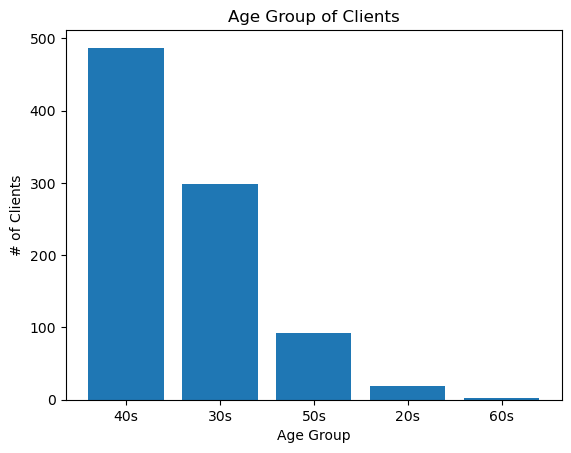

In [30]:
# Graph the data
x_axis = churn_df["Age Group"].value_counts().index
y_axis = churn_df["Age Group"].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel("Age Group")
plt.ylabel("# of Clients")
plt.xticks(x_axis)
plt.title("Age Group of Clients")
plt.show()

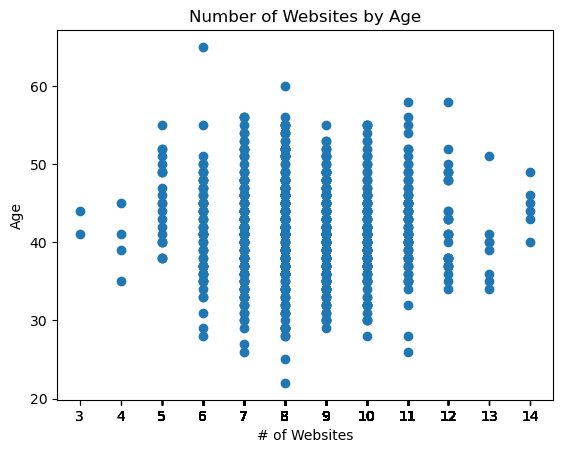

In [31]:
# Looking at age groups by number of sites

y_axis = churn_df["Age"]
x_axis = churn_df["Number of Websites Used"]
plt.scatter(x_axis, y_axis)
plt.ylabel("Age")
plt.xlabel("# of Websites")
plt.xticks(x_axis)
plt.title("Number of Websites by Age")
plt.show()

In [32]:
churn_df.columns

Index(['Names', 'Age', 'Total Purchase', 'Account Manager', 'Years',
       'Number of Websites Used', 'Onboard Date', 'Location', 'Company',
       'Churn', 'Age Group'],
      dtype='object')

In [33]:
churn_lr_df=churn_df.drop(columns=["Names", "Onboard Date", "Location", "Company", "Age Group"], axis=1)
churn_lr_df.head()

,Age,Total Purchase,Account Manager,Years,Number of Websites Used,Churn
0,42,11066.80,0,7.22,8,1
1,41,11916.22,0,6.50,11,1
2,38,12884.75,0,6.67,12,1
3,42,8010.76,0,6.71,10,1
4,37,9191.58,0,5.56,9,1


In [34]:
churn_lr_df.columns

Index(['Age', 'Total Purchase', 'Account Manager', 'Years',
       'Number of Websites Used', 'Churn'],
      dtype='object')

In [35]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = churn_lr_df["Churn"]

# Separate the X variable, the features
x = churn_lr_df.drop(columns="Churn")

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [37]:
x.head()

,Age,Total Purchase,Account Manager,Years,Number of Websites Used
0,42,11066.80,0,7.22,8
1,41,11916.22,0,6.50,11
2,38,12884.75,0,6.67,12
3,42,8010.76,0,6.71,10
4,37,9191.58,0,5.56,9


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

print('x_train:', len(x_train))
print('x_test:', len(x_test))
print('y_train', len(y_train))
print('y_test', len(y_test))


x_train: 630
x_test: 270
y_train 630
y_test 270


In [39]:
y.value_counts()

0    750
1    150
Name: Churn, dtype: int64

# Logistic Regression:

In [40]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [41]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy)

Logistic Regression accuracy is : 0.8777777777777778


In [42]:
prediction = classifier.predict(x_test)
pd.DataFrame({"Prediction": prediction, "Actual": y_test}).tail(10)

,Prediction,Actual
286,0,0
516,0,0
597,0,0
607,0,0
662,0,0
245,0,0
257,0,0
161,0,0
894,0,0
705,0,0


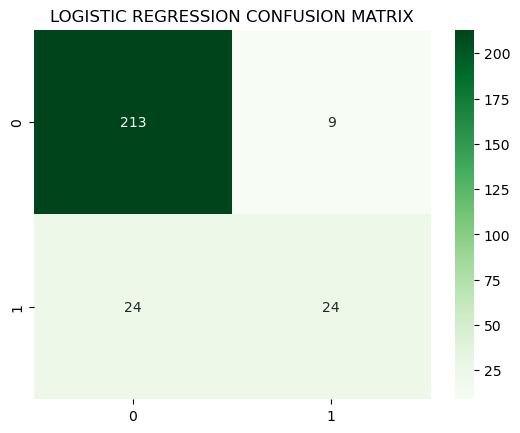

In [43]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap= 'Greens')
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX");

In [44]:
print("classification_report")
target_names = ["Class Purple", "Class Yellow"]
print(classification_report(y_test, prediction, target_names=target_names))

classification_report
              precision    recall  f1-score   support

Class Purple       0.84      0.99      0.91       222
Class Yellow       0.70      0.15      0.24        48

    accuracy                           0.84       270
   macro avg       0.77      0.57      0.58       270
weighted avg       0.82      0.84      0.79       270



# Decision Tree:
DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy)

Decision Tree accuracy is : 0.8333333333333334


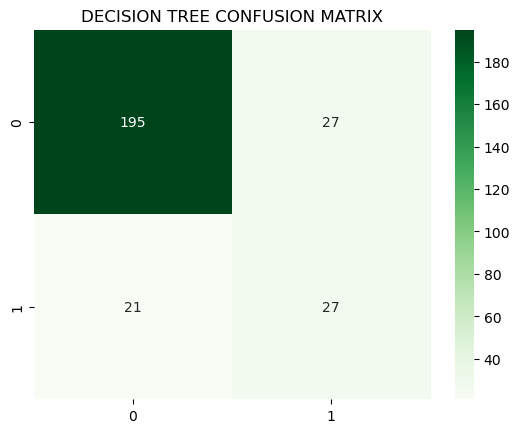

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='Greens')
plt.title("DECISION TREE CONFUSION MATRIX");

In [48]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       222
           1       0.50      0.56      0.53        48

    accuracy                           0.82       270
   macro avg       0.70      0.72      0.71       270
weighted avg       0.83      0.82      0.83       270



# Random Forest:
Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier 
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("Random forest accuracy :",accuracy)

Random forest accuracy : 0.8703703703703703


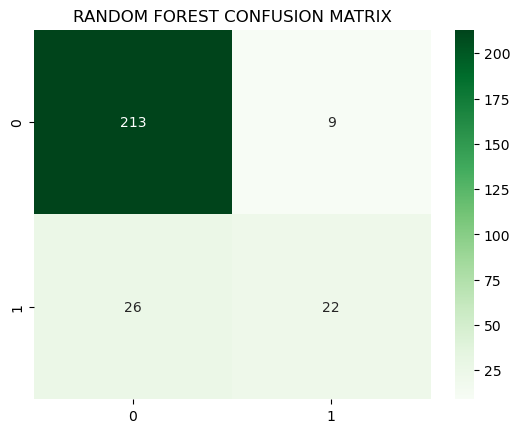

In [50]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='Greens')
plt.title("RANDOM FOREST CONFUSION MATRIX");

In [51]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       222
           1       0.71      0.46      0.56        48

    accuracy                           0.87       270
   macro avg       0.80      0.71      0.74       270
weighted avg       0.86      0.87      0.86       270



# K-Nearest Neighbors:
K-Nearest Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier 
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate the accuracy
accuracy = model.score(x_test, y_test)
print("K-Nearest Neighbors accuracy:", accuracy)


K-Nearest Neighbors accuracy: 0.8592592592592593


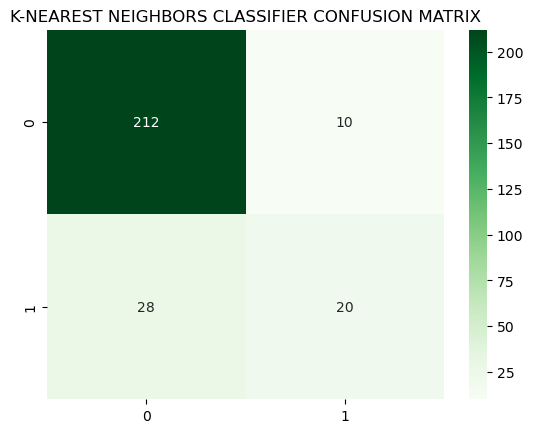

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='Greens')
plt.title("K-NEAREST NEIGHBORS CLASSIFIER CONFUSION MATRIX");

In [54]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       222
           1       0.67      0.42      0.51        48

    accuracy                           0.86       270
   macro avg       0.77      0.69      0.72       270
weighted avg       0.84      0.86      0.85       270



# AdaBoost:
AdaBoost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
model = make_pipeline(StandardScaler(), AdaBoostClassifier())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print("AdaBoost Classifier accuracy :",accuracy)

AdaBoost Classifier accuracy : 0.8629629629629629


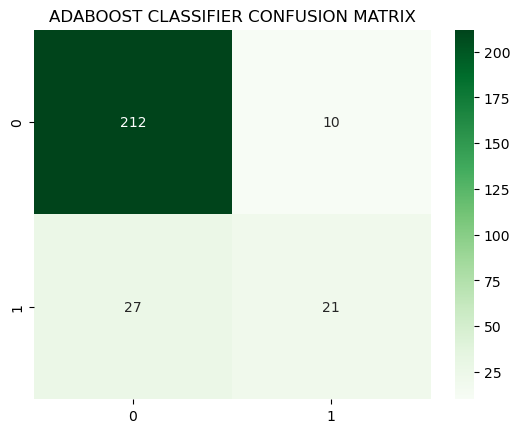

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='Greens')
plt.title("ADABOOST CLASSIFIER CONFUSION MATRIX");

In [57]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       222
           1       0.68      0.44      0.53        48

    accuracy                           0.86       270
   macro avg       0.78      0.70      0.73       270
weighted avg       0.85      0.86      0.85       270



# Gradient Boosting:
Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Gradient Boosting Classifier", accuracy)

Gradient Boosting Classifier 0.8629629629629629


Text(0.5, 1.0, 'GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX')

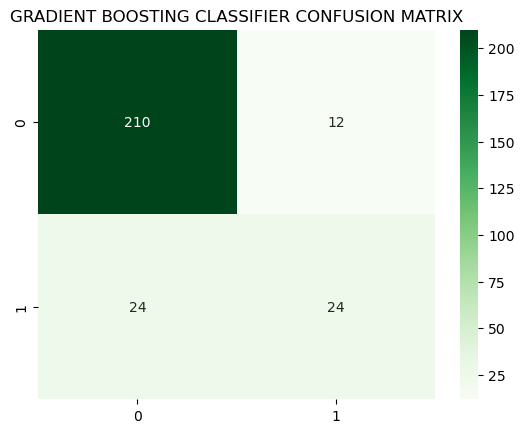

In [59]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='Greens')
plt.title("GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX")

In [60]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       222
           1       0.67      0.50      0.57        48

    accuracy                           0.87       270
   macro avg       0.78      0.72      0.75       270
weighted avg       0.86      0.87      0.86       270



# Extra Tree:
Extra Tree Classifier

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Extra Trees Classifier Score :", accuracy)

Extra Trees Classifier Score : 0.8629629629629629


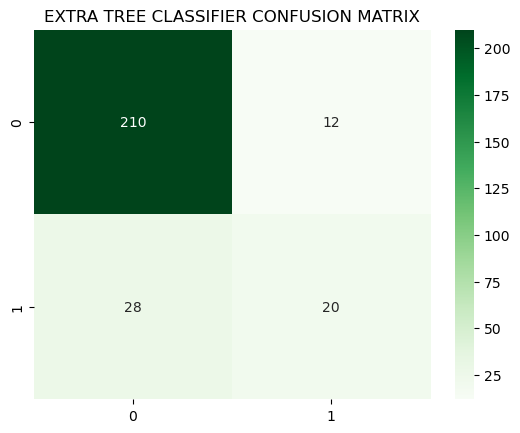

In [62]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='Greens')
plt.title("EXTRA TREE CLASSIFIER CONFUSION MATRIX");

In [ ]:
print(classification_report(y_test, y_pred))